In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv('diabetes.csv')

Explore Data

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
df.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

Visualização de dados

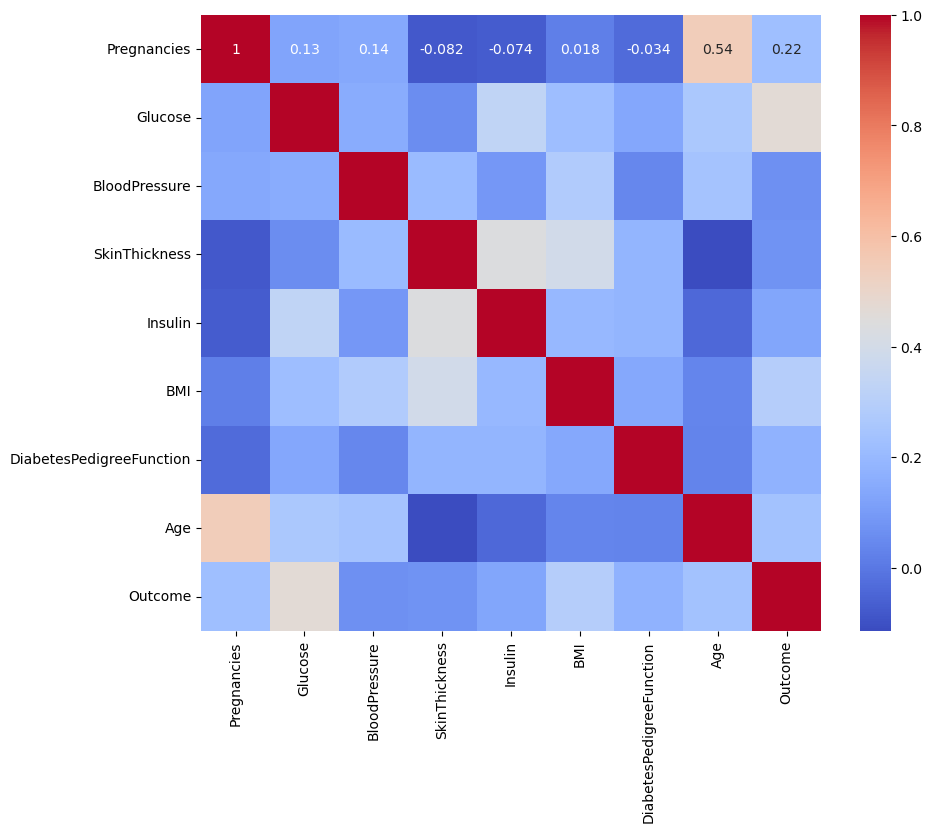

In [11]:
continuous_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[continuous_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

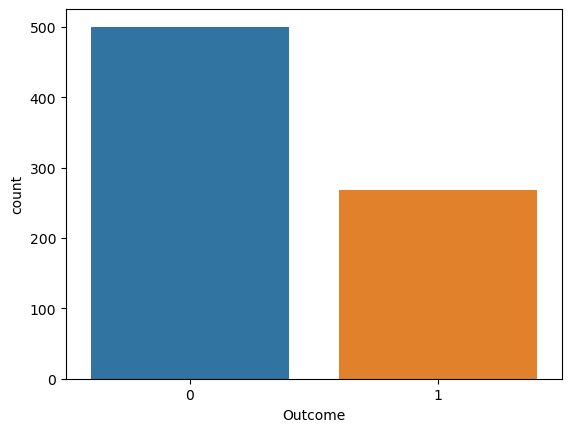

In [12]:
sns.countplot(x='Outcome',data=df)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_22776\498178910.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'] )
c:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Distripution plot'}, xlabel='Pregnancies', ylabel='Density'>

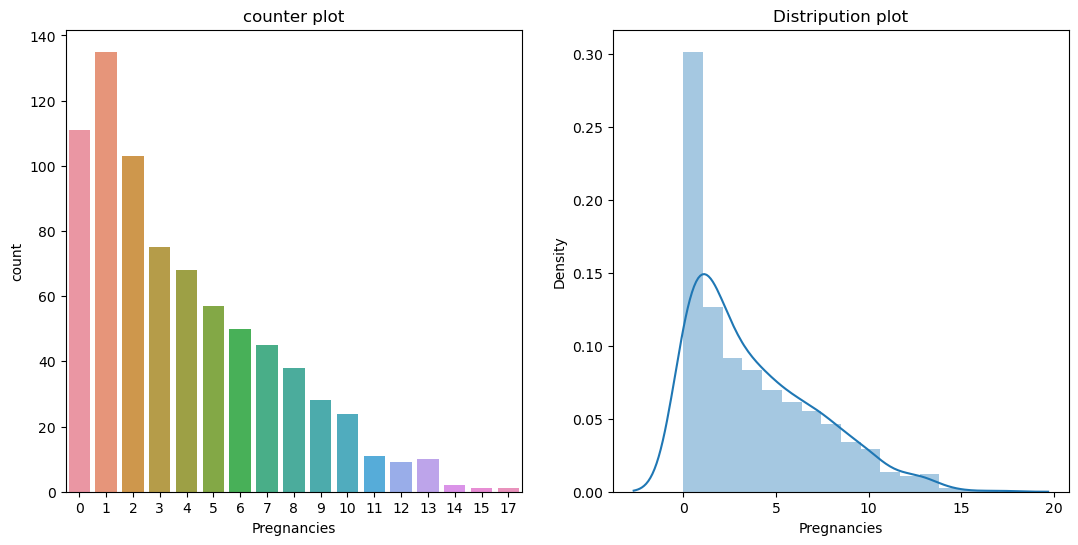

In [13]:
plt.figure(figsize =(20,6))
plt.subplot (1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data= df)

plt.subplot (1,3,2)
plt.title('Distripution plot')
sns.distplot(df['Pregnancies'] )


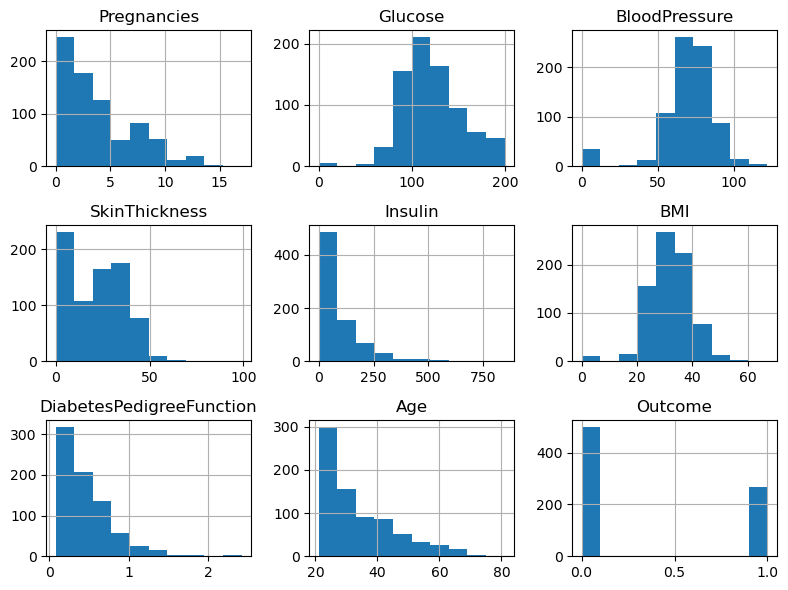

In [14]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

Criar o modelo

In [15]:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_Age'] = df['Glucose'] * df['Age']
df['BMI_Age'] = df['BMI'] * df['Age']

In [16]:
X=df.drop('Outcome', axis=1)
y= df['Outcome']

In [17]:
#important_features = ["Glucose", "BMI", "Age", "Pregnancies"]

In [18]:
#X_important = X[important_features]

In [19]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

SMOTE

In [20]:
#ros = RandomOverSampler(random_state=42)
#X_ros,y_ros = ros.fit_resample(X,y)

smote = SMOTE(random_state=42)
X_ros,y_ros = smote.fit_resample(X,y)

<Axes: xlabel='Outcome', ylabel='count'>

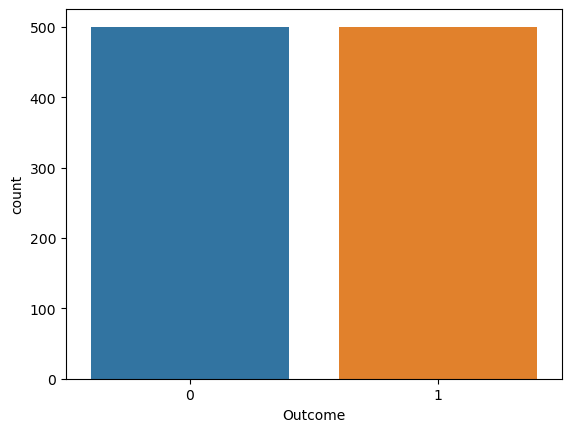

In [21]:
sns.countplot(data=df,x=y_ros)

In [22]:
X_trainOver, X_testOver, y_trainOver, y_testOver = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_trainOver = scaler.fit_transform(X_trainOver)
X_testOver = scaler.transform(X_testOver)

Rede Neural FFN

In [24]:
modeloSequencial = Sequential([

    Dense(64,activation='relu',name='a1',input_shape=(X_trainOver.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    Dense(32,activation='relu',name='a2',kernel_regularizer=regularizers.l2(0.01)),
    Dense(1,activation='sigmoid',name='a3',kernel_regularizer=regularizers.l2(0.01))

]
)

In [25]:
modeloSequencial.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    metrics=['accuracy']

)

In [26]:
modeloSequencial.fit(X_trainOver, y_trainOver,
          epochs=75,
          batch_size=32
         )

Epoch 1/75
25/25 [==============================] - 1s 1ms/step - loss: 1.2584 - accuracy: 0.6012
Epoch 2/75
25/25 [==============================] - 0s 1ms/step - loss: 1.0729 - accuracy: 0.7325
Epoch 3/75
25/25 [==============================] - 0s 1ms/step - loss: 0.9800 - accuracy: 0.7375
Epoch 4/75
25/25 [==============================] - 0s 1ms/step - loss: 0.9105 - accuracy: 0.7450
Epoch 5/75
25/25 [==============================] - 0s 1ms/step - loss: 0.8522 - accuracy: 0.7462
Epoch 6/75
25/25 [==============================] - 0s 1ms/step - loss: 0.8044 - accuracy: 0.7525
Epoch 7/75
25/25 [==============================] - 0s 1ms/step - loss: 0.7637 - accuracy: 0.7600
Epoch 8/75
25/25 [==============================] - 0s 1ms/step - loss: 0.7301 - accuracy: 0.7675
Epoch 9/75
25/25 [==============================] - 0s 1ms/step - loss: 0.7002 - accuracy: 0.7675
Epoch 10/75
25/25 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.7688
Epoch 11/75
25/25 [

In [27]:

y_predOver = modeloSequencial.predict(X_testOver)
for i in range(len(y_predOver)):
    if y_predOver[i]>=0.5:
        y_predOver[i]= 1
    else:
        y_predOver[i]= 0

7/7 [==============================] - 0s 1ms/step


In [28]:
print("Acuracia:", accuracy_score(y_testOver, y_predOver))
print("Matriz de confusão:")
print(confusion_matrix(y_testOver, y_predOver))
print("Relatório de classificação:")
print(classification_report(y_testOver, y_predOver))

Acuracia: 0.79
Matriz de confusão:
[[75 24]
 [18 83]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78        99
           1       0.78      0.82      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



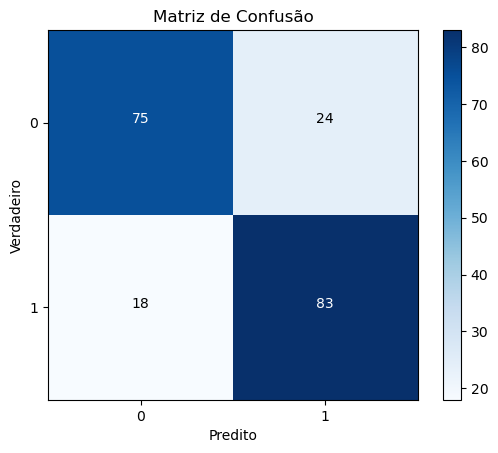

In [29]:
cm = confusion_matrix(y_testOver, y_predOver)

# Plotar a matriz de confusão
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
classes = np.unique(y_testOver)
plt.xticks(classes, [str(i) for i in classes])
plt.yticks(classes, [str(i) for i in classes])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Adicionar os valores dentro dos quadrados
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

7/7 [==============================] - 0s 1ms/step


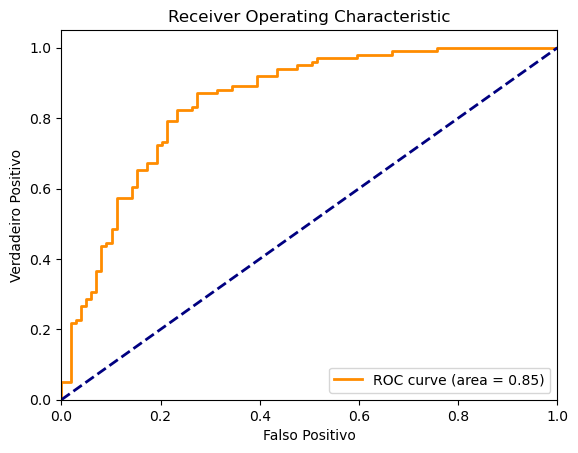

In [30]:
y_pred_proba = modeloSequencial.predict(X_testOver)

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_testOver, y_pred_proba)

# Calcule a AUC
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Epoch 1/50


25/25 [==============================] - 0s 15ms/step - loss: 0.5111 - accuracy: 0.7987 - val_loss: 0.5548 - val_accuracy: 0.7850
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5129 - accuracy: 0.7962 - val_loss: 0.5538 - val_accuracy: 0.7950
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5098 - accuracy: 0.7950 - val_loss: 0.5520 - val_accuracy: 0.8000
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.8025 - val_loss: 0.5533 - val_accuracy: 0.7950
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.8000 - val_loss: 0.5531 - val_accuracy: 0.7950
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7937 - val_loss: 0.5535 - val_accuracy: 0.7850
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5126 - accuracy: 0.7975 - val_loss: 0.5526 - val_accuracy: 0.7900
Epoch 8/50
25/25 [============

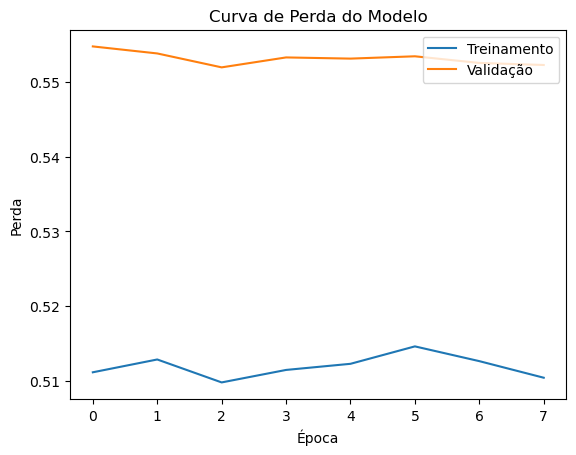

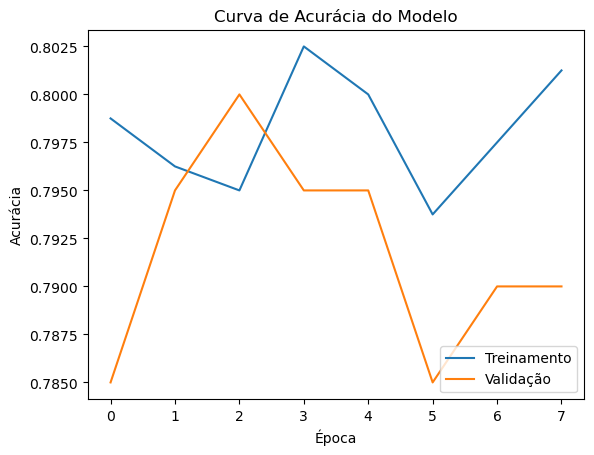

In [32]:
history = modeloSequencial.fit(X_trainOver, y_trainOver, epochs=50, validation_data=(X_testOver, y_testOver), callbacks=[early_stopping])

# Plotando a perda (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

# Plotando a acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='lower right')
plt.show()